<a href="https://colab.research.google.com/github/DrStephPowers/BIA/blob/main/Ch8_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df2 = pd.read_excel('/content/drive/MyDrive/BI BA Handbook/Chapter 4/bargainnumeric.xlsx')

In [ ]:
df3 = pd.read_excel('/content/drive/MyDrive/BI BA Handbook/Chapter 4/CRMclean.xlsx', sheet_name="Sheet1")

In [ ]:
dres = pd.read_excel('/content/drive/MyDrive/BI BA Handbook/Chapter 8/Attribute DataSet.xlsx')

Attribute data from Usman, M. and A. Ahmed (2014). Dresses_Attribute_Sales. UCI Machine Learning Repository

## KNN with ordinal

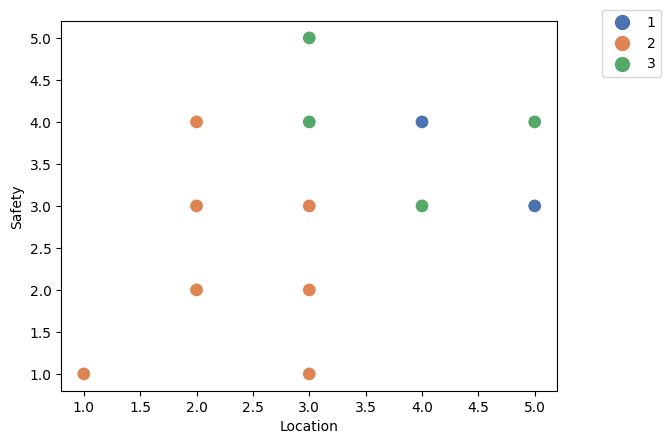

In [ ]:
from seaborn import scatterplot
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['lines.markersize'] = 10

scatterplot(x=df2["Q15"],y=df2["Q18"], hue=df2["Q23"], palette="deep")
plt.legend(loc='upper center', bbox_to_anchor=(1.15, 1.05), ncol=1)
plt.xlabel('Location')
plt.ylabel('Safety')
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
x_train = df2[["Q15", "Q18"]].to_numpy()

In [ ]:
x_test = ([1, 1], [3, 5], [5, 3], [4, 5])

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn.fit(x_train, df2["Q23"])

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = knn.predict(x_test)
y_pred

array([2, 3, 1, 3])

In [ ]:
y_test = ([2, 3, 3, 3])

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.75

### KNN with interval, ratio

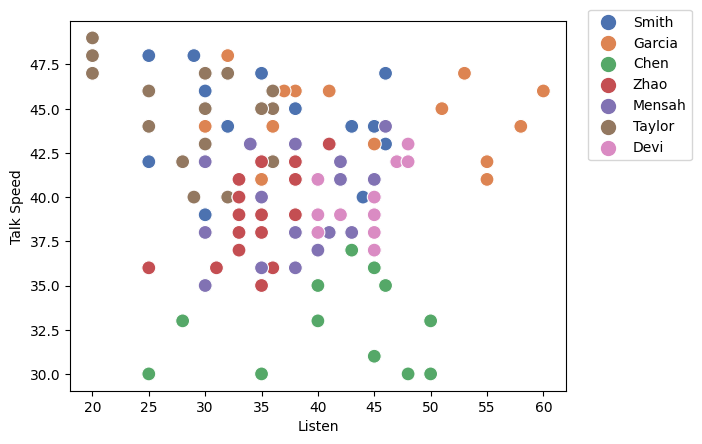

In [ ]:
from seaborn import scatterplot
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['lines.markersize'] = 10

scatterplot(x=df3["Q7"],y=df3["Q8"], hue=df3["Q1"], palette="deep")
plt.legend(loc='upper center', bbox_to_anchor=(1.15, 1.05), ncol=1)
plt.xlabel('Listen')
plt.ylabel('Talk Speed')
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [ ]:
x_train = df3[["Q7", "Q8"]].to_numpy()

In [ ]:
x_test = ([22, 48], [36, 41], [46, 42], [58, 46])

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)

In [ ]:
knn.fit(x_train, df3["Q1"])

KNeighborsClassifier(n_neighbors=7)

In [ ]:
y_pred = knn.predict(x_test)
y_pred

array(['Taylor', 'Zhao', 'Devi', 'Garcia'], dtype=object)

In [ ]:
y_test = (["Smith", "Zhao", "Mensah", "Garcia"])

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.5

### KNN with different K

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


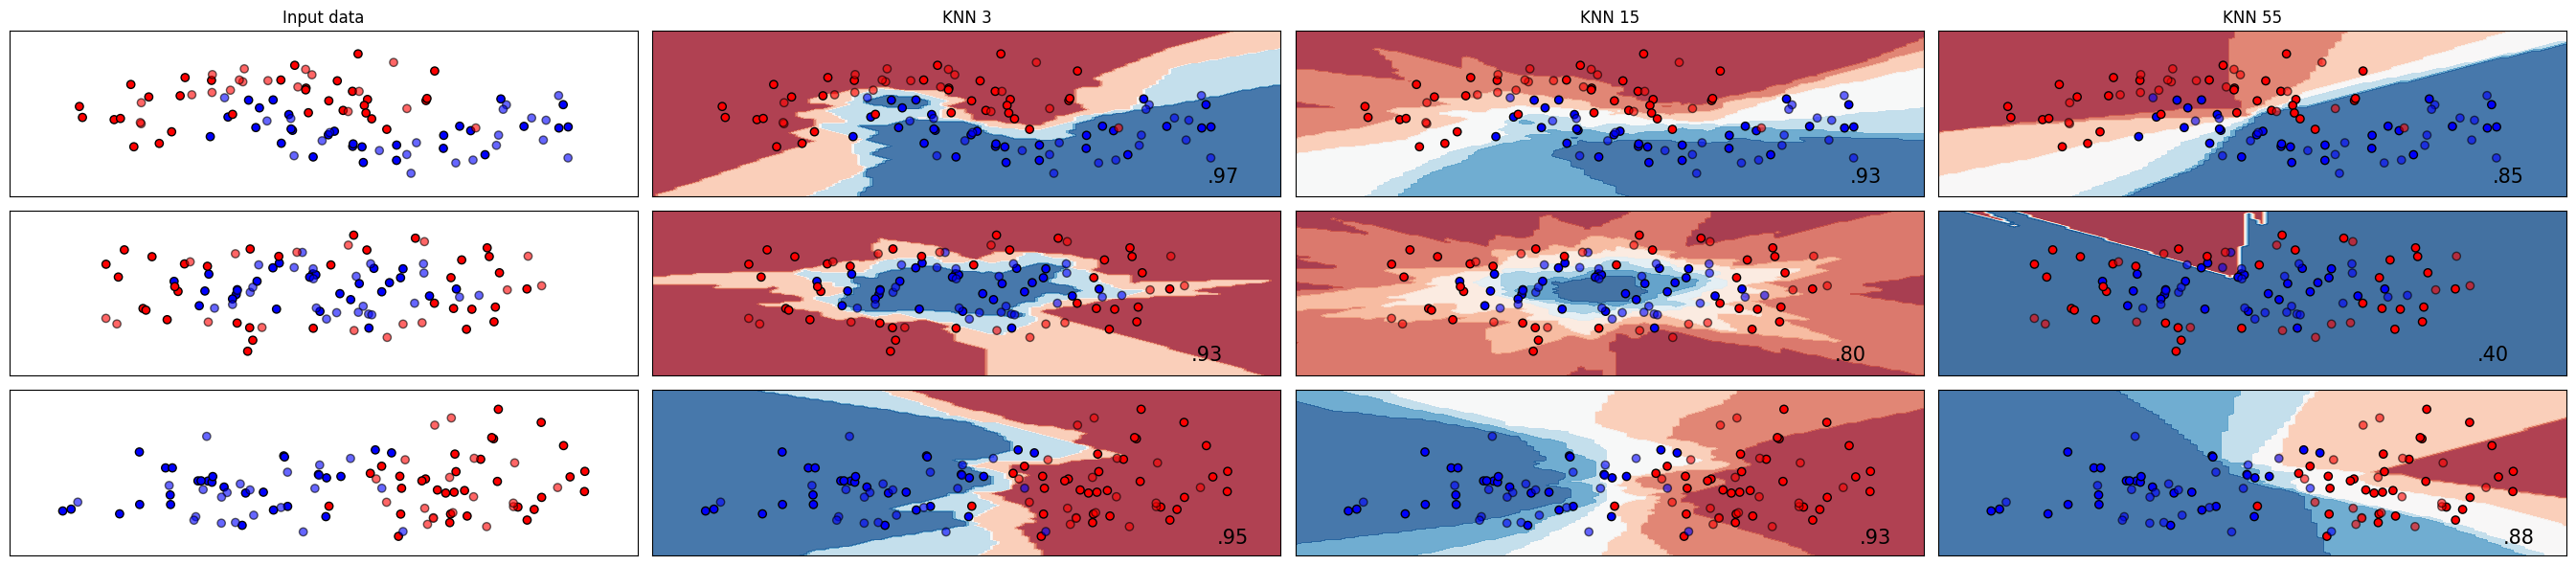

In [ ]:
names = [
    "KNN 3",
    "KNN 15",
    "KNN 55",
]

classifiers = [
    KNeighborsClassifier(3),
    KNeighborsClassifier(15),
    KNeighborsClassifier(55),
]

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

figure = plt.figure(figsize=(27, 6))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)

        clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        DecisionBoundaryDisplay.from_estimator(
            clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
        )

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            x_max - 0.3,
            y_min + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()

## GLM with ordinal predictors

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
df2.head()

,Respondent,Q1,Q2,Q3,Q4a,Q5,Q6,Q7,Q8a,Q8b,...,Q14,Q15,Q17,Q18,Q20,Q22,Q23,Q24,Q24a,South
0,1,5,2,3.0,7.0,2,1,2,1,3,...,4,4,0.0,4,4,1,3,15.0,3.0,0
1,2,1,2,1.0,6.0,1,3,1,3,4,...,1,2,0.0,3,4,2,1,2.0,1.0,0
2,3,3,1,NaN,NaN,2,1,2,3,1,...,3,3,0.0,3,5,2,1,NaN,NaN,0
3,4,3,1,NaN,NaN,3,4,2,3,2,...,4,2,0.0,4,4,1,3,1.0,1.0,0
4,5,2,2,3.0,1.0,1,3,2,2,3,...,2,2,0.0,2,2,3,2,6.0,2.0,1


In [ ]:
df2["South"] = df2["Q23"]

In [ ]:
df2["South"].replace({1 : 0, 2: 1, 3: 0}, inplace=True)

In [ ]:
x_train = df2[["Q15", "Q18"]].to_numpy()

In [ ]:
x_test = ([1, 1], [3, 5], [5, 3], [4, 5])

In [ ]:
glm = LogisticRegression()

In [ ]:
glm.fit(x_train, df2["South"])

LogisticRegression()

In [ ]:
y_pred = glm.predict(x_test)
y_pred

array([1, 0, 0, 0])

In [ ]:
y_test = ([1, 0, 0, 0])

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[3, 0],
       [0, 1]])

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=glm.classes_)

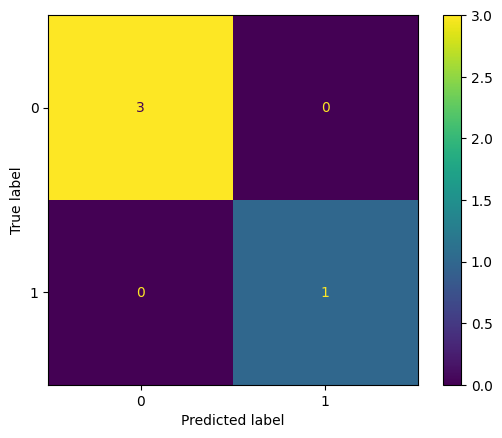

In [ ]:
disp.plot()

In [ ]:
precision_score(y_test, y_pred)

1.0

In [ ]:
recall_score(y_test, y_pred)

1.0

PRACTICE

GLM with interval/ratio

In [ ]:
df3["Q12"]

0       Neutral
1      Positive
2       Neutral
3      Positive
4      Positive
         ...   
130    Positive
131     Neutral
132    Positive
133     Neutral
134    Positive
Name: Q12, Length: 135, dtype: object

In [ ]:
df3["Positive"] = df3["Q12"]

In [ ]:
df3["Positive"].replace({"Neutral" : 0, "Negative": 0, "Positive": 1}, inplace=True)

In [ ]:
x_train = df3[["Q7", "Q8"]].to_numpy()

In [ ]:
x_test = ([22, 48], [36, 41], [46, 42], [58, 46])

In [ ]:
y_test = ([0, 0, 1, 1])

## Support Vector Machines (SVM)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

In [ ]:
df3["Positive"] = df3["Q12"]
df3["Positive"].replace({"Neutral" : 0, "Negative": 0, "Positive": 1}, inplace=True)

In [ ]:
x_train = df3[["Q7", "Q8"]].to_numpy()
x_test = ([22, 48], [36, 41], [46, 42], [58, 46])

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
svm = SVC()
svm.fit(x_train, df3["Positive"])

SVC()

In [ ]:
y_pred = svm.predict(x_test)
y_pred

array([0, 1, 1, 1])

In [ ]:
y_test = ([0, 0, 1, 1])

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.75

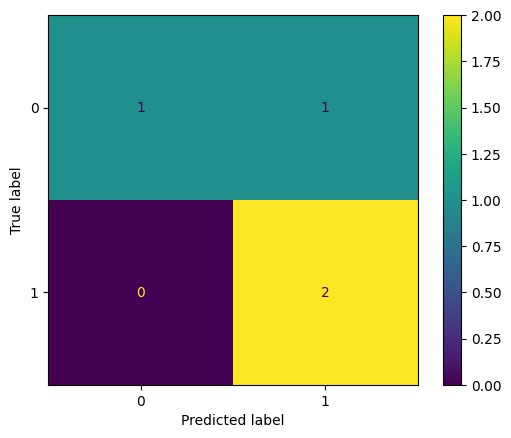

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm.classes_)
disp.plot()

In [ ]:
precision_score(y_test, y_pred)

0.6666666666666666

In [ ]:
recall_score(y_test, y_pred)

1.0

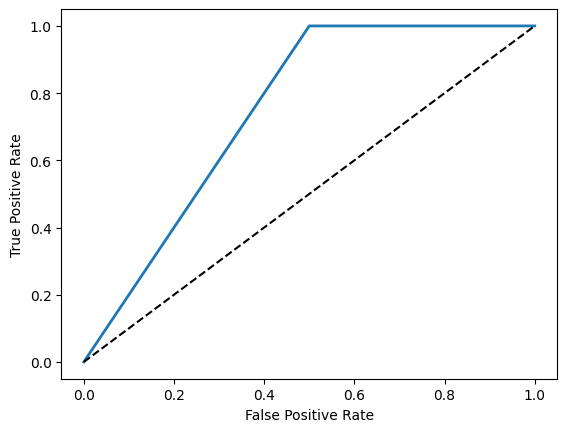

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve

In [ ]:
df3["Positive"] = df3["Q12"]
df3["Positive"].replace({"Neutral" : 0, "Negative": 0, "Positive": 1}, inplace=True)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df3[["Q7", "Q8", "Q9", "Q10"]],
                                                   df3[["Positive"]], test_size=0.2,
                                                   stratify=df3[["Positive"]])

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
svm = SVC()
svm.fit(x_train, y_train)

y_pred = svm.predict(x_test)
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1])

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8518518518518519

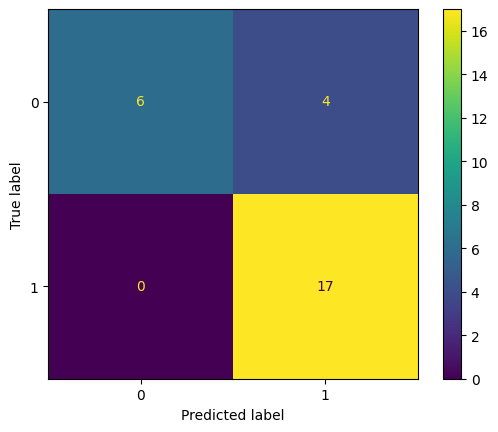

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm.classes_)
disp.plot()

In [ ]:
precision_score(y_test, y_pred)

0.8095238095238095

In [ ]:
recall_score(y_test, y_pred)

1.0

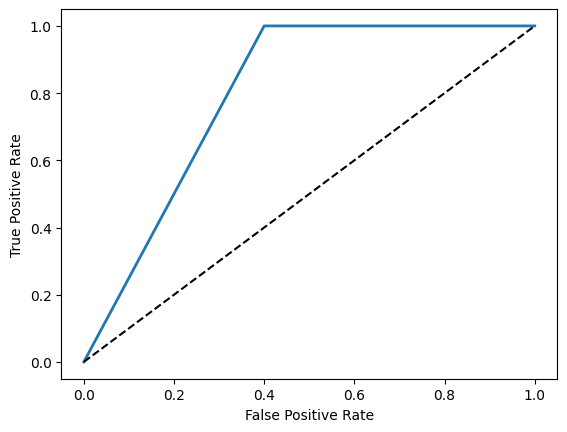

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df3[["Q7", "Q8"]],
                                                   df3[["Q1"]], test_size=0.2, random_state=1900,
                                                   stratify=df3[["Q1"]])

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
svm = SVC()
svm.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [ ]:
y_pred = svm.predict(x_test)
y_pred

array(['Taylor', 'Zhao', 'Zhao', 'Zhao', 'Mensah', 'Mensah', 'Garcia',
       'Smith', 'Mensah', 'Mensah', 'Zhao', 'Garcia', 'Taylor', 'Mensah',
       'Chen', 'Taylor', 'Zhao', 'Devi', 'Taylor', 'Chen', 'Zhao', 'Devi',
       'Mensah', 'Taylor', 'Zhao', 'Mensah', 'Mensah'], dtype=object)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.4444444444444444

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df3[["Q7", "Q8", "Q9", "Q10"]],
                                                   df3[["Q1"]], test_size=0.2,  random_state=1900,
                                                   stratify=df3[["Q1"]])


In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
svm = SVC()
svm.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [ ]:
y_pred = svm.predict(x_test)
y_pred

array(['Taylor', 'Chen', 'Zhao', 'Mensah', 'Mensah', 'Mensah', 'Smith',
       'Smith', 'Zhao', 'Zhao', 'Zhao', 'Garcia', 'Garcia', 'Mensah',
       'Chen', 'Garcia', 'Zhao', 'Mensah', 'Taylor', 'Chen', 'Mensah',
       'Devi', 'Smith', 'Taylor', 'Mensah', 'Mensah', 'Mensah'],
      dtype=object)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.5185185185185185

## Naive Bayes with nominal, ordinal, and ratio predictor

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
dres.head()

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type,Recommendation
0,1006032852,Sexy,Low,4.6,M,Summer,o-neck,sleevless,empire,NaN,chiffon,ruffles,animal,1
1,1212192089,Casual,Low,0.0,L,Summer,o-neck,Petal,natural,microfiber,NaN,ruffles,animal,0
2,1190380701,vintage,High,0.0,L,Automn,o-neck,full,natural,polyster,NaN,NaN,print,0
3,966005983,Brief,Average,4.6,L,Spring,o-neck,full,natural,silk,chiffon,embroidary,print,1
4,876339541,cute,Low,4.5,M,Summer,o-neck,butterfly,natural,chiffonfabric,chiffon,bow,dot,0


In [ ]:
dres["Style"] = dres["Style"].astype('category')
cat = dres["Style"].cat.categories
catStyle = list(cat)
catStyle

['Brief',
 'Casual',
 'Flare',
 'Novelty',
 'OL',
 'Sexy',
 'bohemian',
 'cute',
 'fashion',
 'party',
 'sexy',
 'vintage',
 'work']

In [ ]:
for i in range(len(catStyle)):
  dres["Style"].replace({catStyle[i]: i+1}, inplace=True)

In [ ]:
dres["Price"] = dres["Price"].astype('category')
cat = dres["Price"].cat.categories
catStyle = list(cat)
catStyle

['Average', 'High', 'Low', 'Medium', 'high', 'low', 'very-high']

In [ ]:
dres["Price"].replace({"Low": 1, "low": 1, "Medium": 2, "Average": 2 , "High": 3, "high":3, "very-high": 4}, inplace=True)

In [ ]:
dres["Season"] = dres["Season"].astype('category')
cat = dres["Season"].cat.categories
catStyle = list(cat)
catStyle

['Automn',
 'Autumn',
 'Spring',
 'Summer',
 'Winter',
 'spring',
 'summer',
 'winter']

In [ ]:
dres["Season"].replace({"Automn": "Autumn", "spring": "Spring", "summer": "Summer", "winter": "Winter"}, inplace=True)

In [ ]:
dres["Season"] = dres["Season"].astype('category')
cat = dres["Season"].cat.categories
catStyle = list(cat)
catStyle

['Autumn', 'Spring', 'Summer', 'Winter']

In [ ]:
for i in range(len(catStyle)):
  dres["Season"].replace({catStyle[i]: i+1}, inplace=True)

In [ ]:
dres

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type,Recommendation
0,1006032852,6,1,4.6,M,3,o-neck,sleevless,empire,NaN,chiffon,ruffles,animal,1
1,1212192089,2,1,0.0,L,3,o-neck,Petal,natural,microfiber,NaN,ruffles,animal,0
2,1190380701,12,3,0.0,L,1,o-neck,full,natural,polyster,NaN,NaN,print,0
3,966005983,1,2,4.6,L,2,o-neck,full,natural,silk,chiffon,embroidary,print,1
4,876339541,8,1,4.5,M,3,o-neck,butterfly,natural,chiffonfabric,chiffon,bow,dot,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,713391965,2,1,4.7,M,2,o-neck,full,natural,polyster,NaN,NaN,solid,1
496,722565148,6,1,4.3,free,3,o-neck,full,empire,cotton,NaN,NaN,NaN,0
497,532874347,2,2,4.7,M,3,v-neck,full,empire,cotton,NaN,lace,solid,1
498,655464934,2,2,4.6,L,4,boat-neck,sleevless,empire,silk,broadcloth,applique,print,1


In [ ]:
dres2=dres[["Style", "Season", "Price", "Recommendation"]]
dres2=dres2.dropna()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(dres2[["Style", "Season", "Price"]],
                                                   dres2[["Recommendation"]], test_size=0.2,
                                                   stratify=dres2[["Recommendation"]])

In [ ]:
gnb = GaussianNB()

In [ ]:
gnb.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [ ]:
y_pred = gnb.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.59

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[54,  4],
       [37,  5]])

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gnb.classes_)

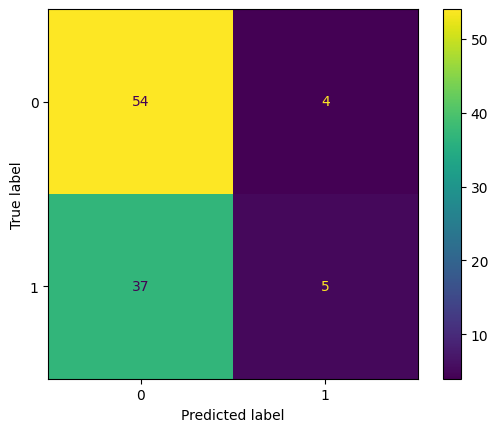

In [ ]:
disp.plot()

In [ ]:
precision_score(y_test, y_pred)

0.5555555555555556

In [ ]:
recall_score(y_test, y_pred)

0.11904761904761904

## Naive Bayes with nominal and ordinal

In [ ]:
dres2=dres[["Rating", "Season", "Price", "Recommendation"]]
dres2=dres2.dropna()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(dres2[["Rating", "Season", "Price"]],
                                                   dres2[["Recommendation"]], test_size=0.2,
                                                   stratify=dres2[["Recommendation"]])

In [ ]:
gnb = GaussianNB()

In [ ]:
gnb.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [ ]:
y_pred = gnb.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1])

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.6

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[54,  4],
       [36,  6]])

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gnb.classes_)

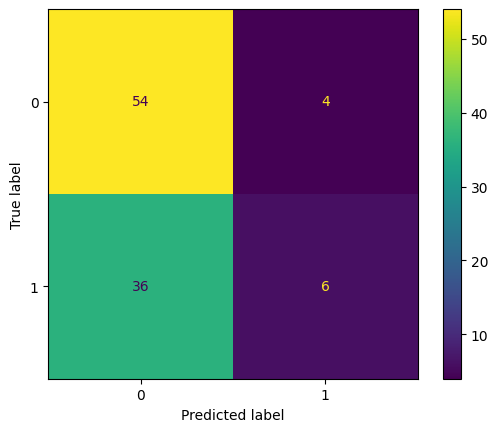

In [ ]:
disp.plot()

In [ ]:
precision_score(y_test, y_pred)

0.6

In [ ]:
recall_score(y_test, y_pred)

0.14285714285714285

### Precision Recall Graph

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay

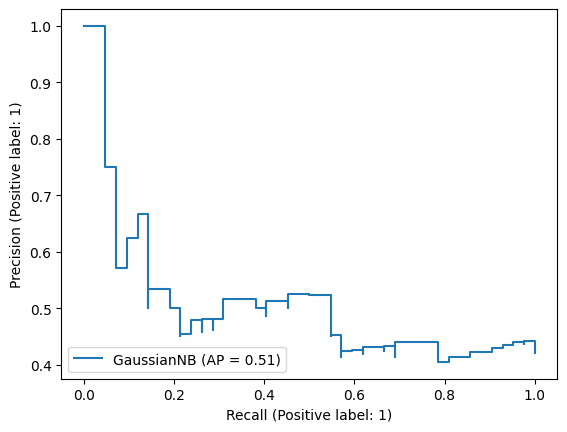

In [ ]:
PrecisionRecallDisplay.from_estimator(gnb, x_test, y_test)

### Multi labels and integer predictors

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [ ]:
x_train = df3[["Q7", "Q8"]].to_numpy()

In [ ]:
x_test = ([22, 48], [36, 41], [46, 42], [58, 46])

In [ ]:
gnb.fit(x_train, df3["Q1"])

GaussianNB()

In [ ]:
y_pred = gnb.predict(x_test)
y_pred

array(['Taylor', 'Zhao', 'Devi', 'Garcia'], dtype='<U6')

In [ ]:
y_test = (["Smith", "Zhao", "Mensah", "Garcia"])

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.5

## Decision Trees

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
df2.head()

,Respondent,Q1,Q2,Q3,Q4a,Q5,Q6,Q7,Q8a,Q8b,...,Q14,Q15,Q17,Q18,Q20,Q22,Q23,Q24,Q24a,South
0,1,5,2,3.0,7.0,2,1,2,1,3,...,4,4,0.0,4,4,1,3,15.0,3.0,0
1,2,1,2,1.0,6.0,1,3,1,3,4,...,1,2,0.0,3,4,2,1,2.0,1.0,0
2,3,3,1,NaN,NaN,2,1,2,3,1,...,3,3,0.0,3,5,2,1,NaN,NaN,0
3,4,3,1,NaN,NaN,3,4,2,3,2,...,4,2,0.0,4,4,1,3,1.0,1.0,0
4,5,2,2,3.0,1.0,1,3,2,2,3,...,2,2,0.0,2,2,3,2,6.0,2.0,1


In [ ]:
df2["South"] = df2["Q23"]
df2["South"].replace({1 : 0, 2: 1, 3: 0}, inplace=True)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df2[["Q2", "Q13", "Q14", "Q15", "Q18", "Q20"]],
                                                   df2[["South"]], test_size=0.2,
                                                   stratify=df2[["South"]])

In [ ]:
dtree = DecisionTreeClassifier()

In [ ]:
dtree.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = dtree.predict(x_test)
y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7692307692307693

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[8, 0],
       [3, 2]])

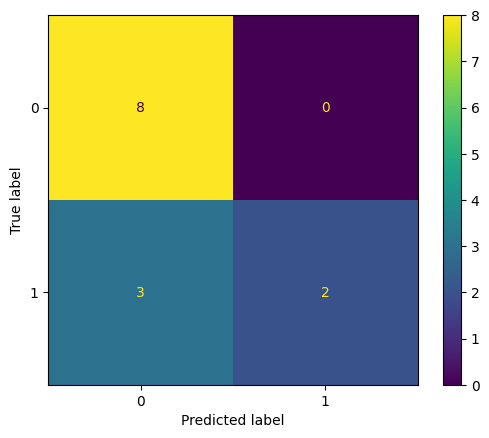

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dtree.classes_)
disp.plot()

In [ ]:
precision_score(y_test, y_pred)

1.0

In [ ]:
recall_score(y_test, y_pred)

0.4

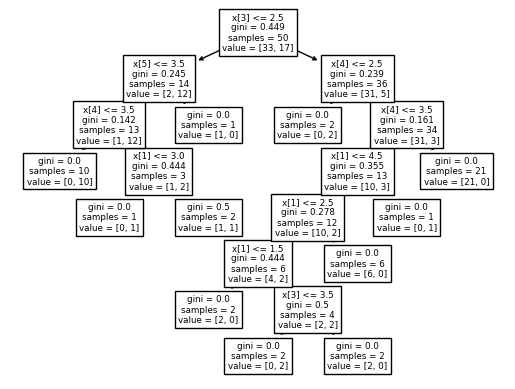

In [ ]:
tree.plot_tree(dtree)
plt.show()

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df2[["Q2", "Q13", "Q14", "Q15", "Q18", "Q20"]],
                                                   df2[["Q23"]], test_size=0.2,
                                                   stratify=df2[["Q23"]])

In [ ]:
dtree = DecisionTreeClassifier()

In [ ]:
dtree.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = dtree.predict(x_test)
y_pred

array([1, 1, 1, 1, 2, 1, 3, 3, 3, 2, 1, 3, 1])

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.6153846153846154

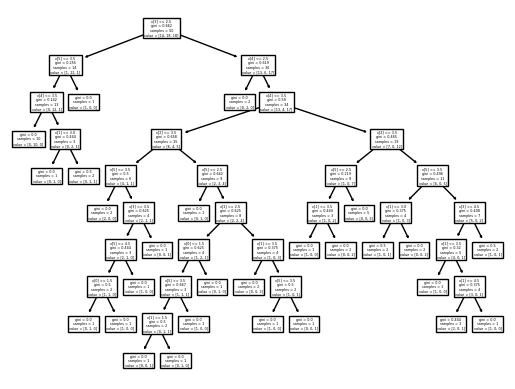

In [ ]:
tree.plot_tree(dtree)
plt.show()

In [ ]:
dtree = DecisionTreeClassifier(max_depth=5)

In [ ]:
dtree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
y_pred = dtree.predict(x_test)
y_pred

array([1, 1, 3, 1, 2, 1, 3, 3, 3, 2, 1, 3, 1])

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.6153846153846154

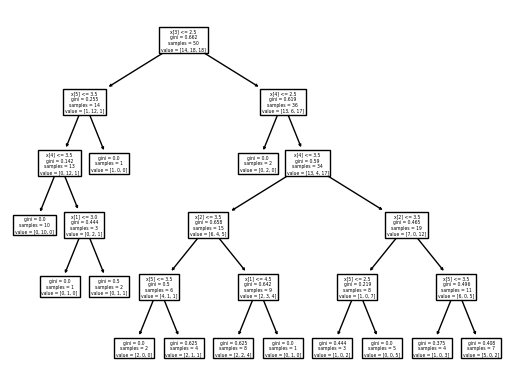

In [ ]:
tree.plot_tree(dtree)
plt.show()

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
df2.head()

,Respondent,Q1,Q2,Q3,Q4a,Q5,Q6,Q7,Q8a,Q8b,...,Q14,Q15,Q17,Q18,Q20,Q22,Q23,Q24,Q24a,South
0,1,5,2,3.0,7.0,2,1,2,1,3,...,4,4,0.0,4,4,1,3,15.0,3.0,0
1,2,1,2,1.0,6.0,1,3,1,3,4,...,1,2,0.0,3,4,2,1,2.0,1.0,0
2,3,3,1,NaN,NaN,2,1,2,3,1,...,3,3,0.0,3,5,2,1,NaN,NaN,0
3,4,3,1,NaN,NaN,3,4,2,3,2,...,4,2,0.0,4,4,1,3,1.0,1.0,0
4,5,2,2,3.0,1.0,1,3,2,2,3,...,2,2,0.0,2,2,3,2,6.0,2.0,1


In [ ]:
df2["South"] = df2["Q23"]
df2["South"].replace({1 : 0, 2: 1, 3: 0}, inplace=True)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df2[["Q2", "Q13", "Q14", "Q15", "Q18", "Q20"]],
                                                   df2[["South"]], test_size=0.2,
                                                   stratify=df2[["South"]])

In [ ]:
rfc = RandomForestClassifier()

In [ ]:
rfc.fit(x_train, y_train)

<ipython-input-18-50ce4f6b0dc9>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x_train, y_train)


RandomForestClassifier()

In [ ]:
y_pred = rfc.predict(x_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1])

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7692307692307693

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[6, 2],
       [1, 4]])

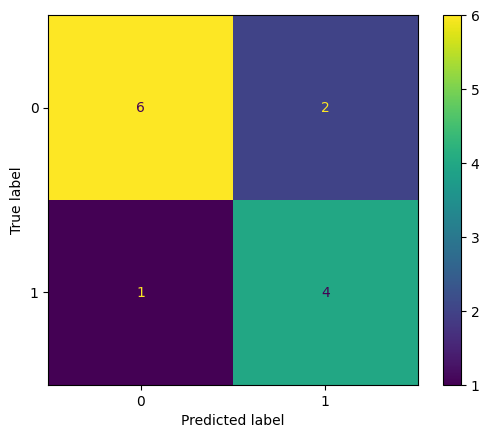

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfc.classes_)
disp.plot()

In [ ]:
precision_score(y_test, y_pred)

0.6666666666666666

In [ ]:
recall_score(y_test, y_pred)

0.8

PRACTICE

Create a multilabel classification model using "Q2", "Q13", "Q14", "Q15", "Q18", "Q20" to identify location (Q23)

## GBM

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df2[["Q2", "Q13", "Q14", "Q15", "Q18", "Q20"]],
                                                   df2[["South"]], test_size=0.2,
                                                   stratify=df2[["South"]])

In [ ]:
gbm = GradientBoostingClassifier()

gbm.fit(x_train, y_train)

y_pred = gbm.predict(x_test)
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0])

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7692307692307693

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[7, 1],
       [2, 3]])

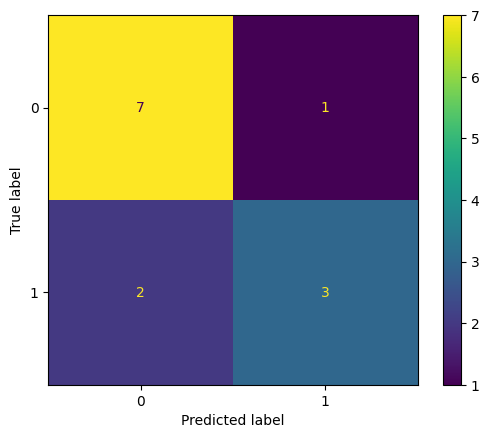

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gbm.classes_)
disp.plot()

In [ ]:
precision_score(y_test, y_pred)

0.75

In [ ]:
recall_score(y_test, y_pred)

0.6

PRACTICE

Create a multilabel classification model using "Q2", "Q13", "Q14", "Q15", "Q18", "Q20" to identify location (Q23)

## Hyperparameters

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV

In [ ]:
df2["South"] = df2["Q23"]
df2["South"].replace({1 : 0, 2: 1, 3: 0}, inplace=True)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df2[["Q2", "Q13", "Q14", "Q15", "Q18", "Q20"]],
                                                   df2[["South"]], test_size=0.2, random_state=1200,
                                                   stratify=df2[["South"]])

In [ ]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)

y_pred = dtree.predict(x_test)
y_pred

array([1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0])

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7692307692307693

In [ ]:
precision_score(y_test, y_pred)

0.6666666666666666

In [ ]:
recall_score(y_test, y_pred)

0.8

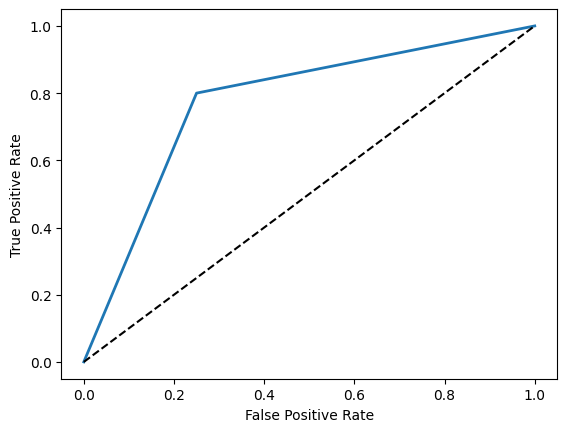

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    "min_samples_split": [2, 3, 4],
    "min_samples_leaf": [1, 2, 3, 4]
}

In [ ]:
grid_search = GridSearchCV(dtree, param_grid, cv=5)
grid_search.fit(x_train, y_train)
grid_search.best_params_

{'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}

In [ ]:
dtree = DecisionTreeClassifier(max_depth=3, min_samples_leaf=4, min_samples_split=2)
dtree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=4)

In [ ]:
y_pred = dtree.predict(x_test)
y_pred

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7692307692307693

In [ ]:
precision_score(y_test, y_pred)

1.0

In [ ]:
recall_score(y_test, y_pred)

0.4

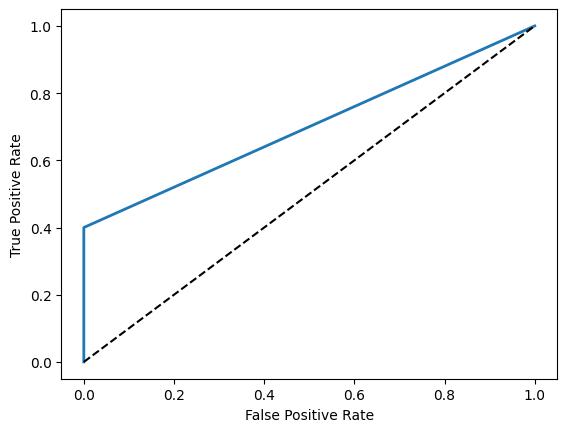

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score

In [ ]:
dtree = DecisionTreeClassifier()

In [ ]:
k_folds = KFold(n_splits = 5)

In [ ]:
scores = cross_val_score(dtree, df2[["Q2", "Q13", "Q14", "Q15", "Q18", "Q20"]], df2[["South"]], cv=k_folds)

In [ ]:
scores.mean()

0.8269230769230769

In [ ]:
dtree = DecisionTreeClassifier(max_depth=3, min_samples_leaf=4, min_samples_split=2)

In [ ]:
k_folds = KFold(n_splits = 5)

In [ ]:
scores = cross_val_score(dtree, df2[["Q2", "Q13", "Q14", "Q15", "Q18", "Q20"]], df2[["South"]], cv=k_folds)

In [ ]:
scores.mean()

0.8102564102564104

In [ ]:
df2["South"].value_counts()

0    41
1    22
Name: South, dtype: int64

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [ ]:
dtree = DecisionTreeClassifier()

In [ ]:
sk_folds = StratifiedKFold(n_splits = 5)

In [ ]:
scores = cross_val_score(dtree, df2[["Q2", "Q13", "Q14", "Q15", "Q18", "Q20"]], df2[["South"]], cv=sk_folds)

In [ ]:
scores.mean()

0.8256410256410257

In [ ]:
dtree = DecisionTreeClassifier(max_depth=3, min_samples_leaf=4, min_samples_split=2)

In [ ]:
sk_folds = StratifiedKFold(n_splits = 5)

In [ ]:
scores = cross_val_score(dtree, df2[["Q2", "Q13", "Q14", "Q15", "Q18", "Q20"]], df2[["South"]], cv=sk_folds)

In [ ]:
scores.mean()

0.7794871794871796

## Important Features

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 4.3 MB/s eta 0:00:00


In [ ]:
import shap

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df2[["Q2", "Q13", "Q14", "Q15", "Q18", "Q20"]],
                                                   df2[["South"]], test_size=0.2,
                                                   stratify=df2[["South"]])
rfc = RandomForestClassifier()

rfc.fit(x_train, y_train)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestClassifier()

In [ ]:
y_pred = rfc.predict(x_test)
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0])

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.6923076923076923

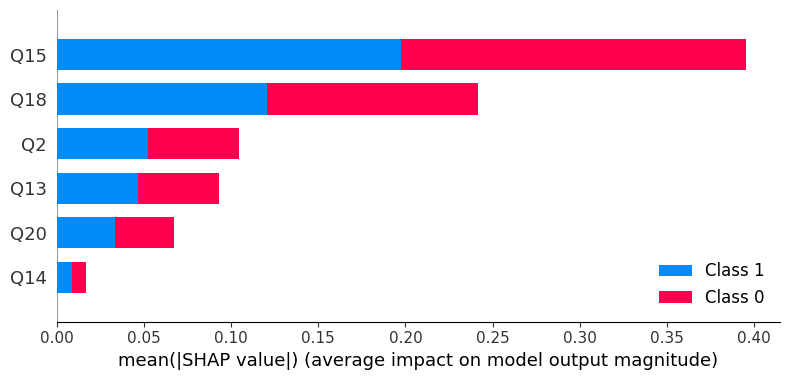

In [ ]:
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values, x_test)

## Comparison

Adapted from https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.colors import ListedColormap
from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split

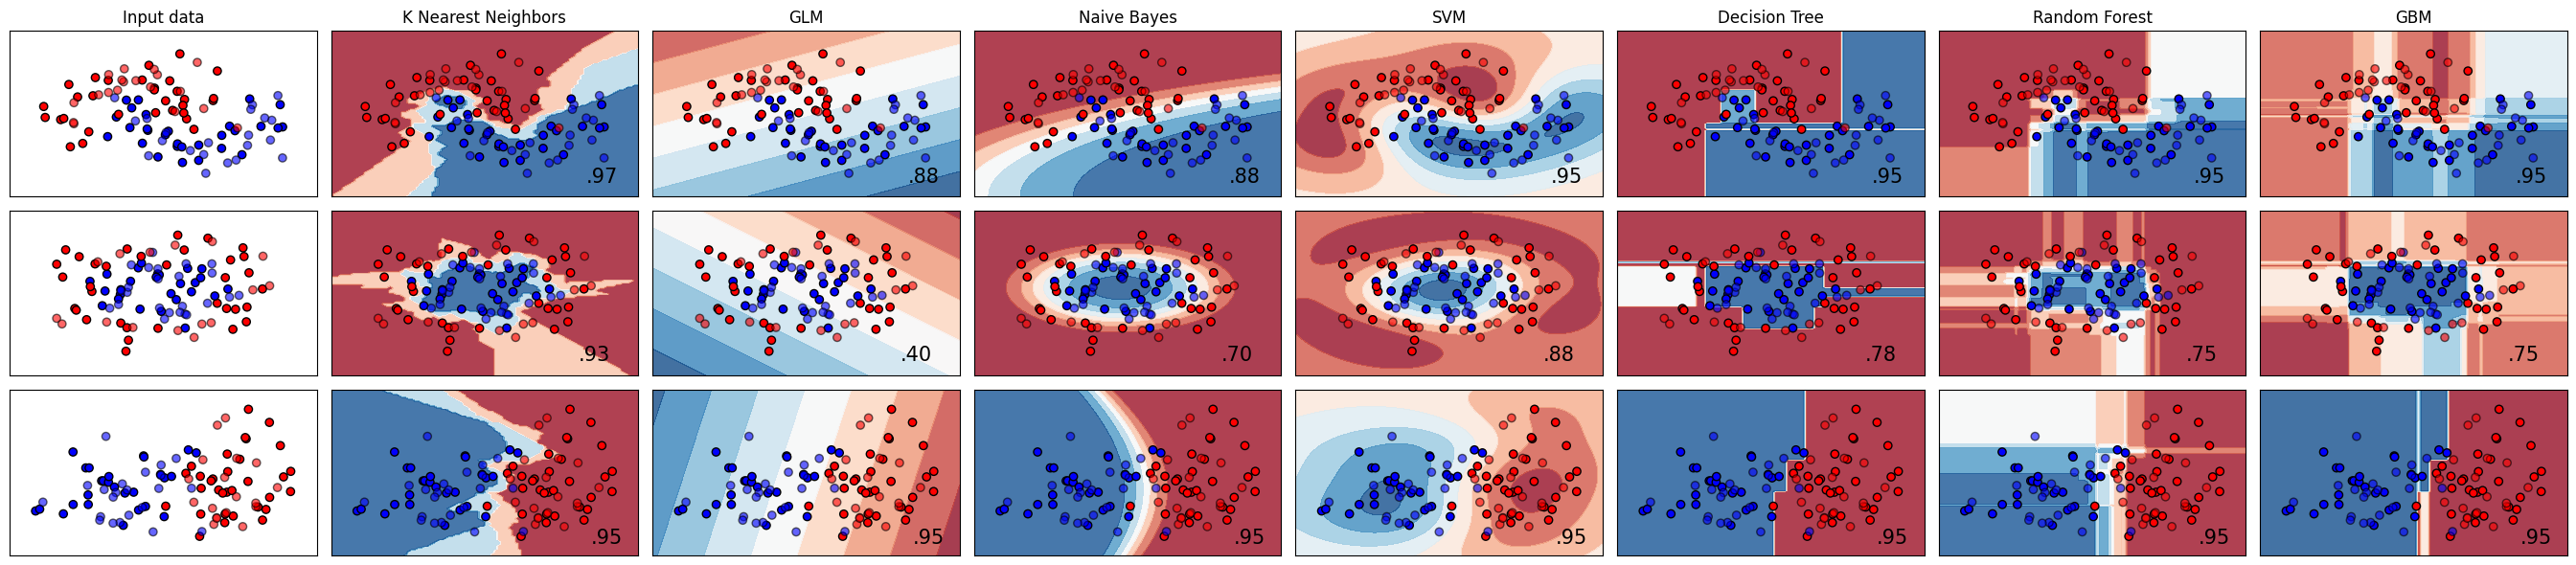

In [ ]:
names = [
    "K Nearest Neighbors",
    "GLM",
    "Naive Bayes",
    "SVM",
    "Decision Tree",
    "Random Forest",
    "GBM"
]

classifiers = [
    KNeighborsClassifier(3),
    LogisticRegression(),
    GaussianNB(),
    SVC(),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    RandomForestClassifier(
        max_depth=5, n_estimators=10, max_features=1, random_state=42),
    GradientBoostingClassifier(random_state=42),
]

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

figure = plt.figure(figsize=(27, 6))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)

        clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        DecisionBoundaryDisplay.from_estimator(
            clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
        )

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            x_max - 0.3,
            y_min + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()

PRACTICE

Create a classification model using the Penguin data

In [2]:
!pip install palmerpenguins

In [3]:
from palmerpenguins import load_penguins

In [4]:
penguins = load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
